In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


<H3>Import CSV Data

In [4]:
df = pd.read_csv("data/StudentsPerformance.csv")

<h3>EDA

In [10]:
print(df.shape)
df.head()

(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Dataset information
- gender = female/male
- race = group
- parental level of education
- lunch 
- test preparation course
- math score
- reading score
- writing score

<h3> Check missing values

In [11]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Theres no missing values in the dataset.

<H3> Check duplicate values

In [12]:
df.duplicated().sum()

0

Theres no duplicate values in the dataset.

<h3> Check null values and data info

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<h3> Check number of unique values

In [14]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### Check statistics of the dataset

In [15]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insight
- From above description of the numercial data, all means are close to each other. (Between 66-69)
- All standard deviation is close to each other. (between 14.60-15.20)
- Minimum score of math is 0, reading and writing is higher with 17 and 10 respectively.

### Exploring Data

In [19]:
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [20]:
print("Categories in 'gender' variable", end= " ")
print(df['gender'].unique())
print("Categories in 'race/ethnicity' variable", end= " ")
print(df['race/ethnicity'].unique())
print("Categories in 'parental level of education' variable", end= " ")
print(df['parental level of education'].unique())
print("Categories in 'lunch' variable", end= " ")
print(df['lunch'].unique())
print("Categories in 'test preparation course' variable", end= " ")
print(df['test preparation course'].unique())

Categories in 'gender' variable ['female' 'male']
Categories in 'race/ethnicity' variable ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable ['standard' 'free/reduced']
Categories in 'test preparation course' variable ['none' 'completed']


In [21]:
# define numerical & categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features: {}'.format(len(numerical_features), numerical_features))
print('We have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### Adding columns for 'Total score' and 'Average score'

In [25]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average score'] = df['total score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [34]:
math_full = df[df['math score'] == 100]['average score'].count()
reading_full = df[df['reading score'] == 100]['average score'].count()
writing_full = df[df['writing score'] == 100]['average score'].count()

print('Number of studetns with full score in math: {}'.format(math_full))
print('Number of studetns with full score in reading: {}'.format(reading_full))
print('Number of studetns with full score in writing: {}'.format(writing_full))

Number of studetns with full score in math: 7
Number of studetns with full score in reading: 17
Number of studetns with full score in writing: 14


In [35]:
math_less = df[df['math score'] <= 20]['average score'].count()
reading_less = df[df['reading score'] <= 20]['average score'].count()
writing_less = df[df['writing score'] <= 20]['average score'].count()

print('Number of studetns with score less than 20 in math: {}'.format(math_less))
print('Number of studetns with score less than 20 in reading: {}'.format(reading_less))
print('Number of studetns with score less than 20 in writing: {}'.format(writing_less))

Number of studetns with score less than 20 in math: 4
Number of studetns with score less than 20 in reading: 1
Number of studetns with score less than 20 in writing: 3


### Insight
- Weakest subject among all student = math
- Strongest subject among all student = reading

## Visualization

### 4.1 Histogram & Kernel Distribution Estimate (KDE)


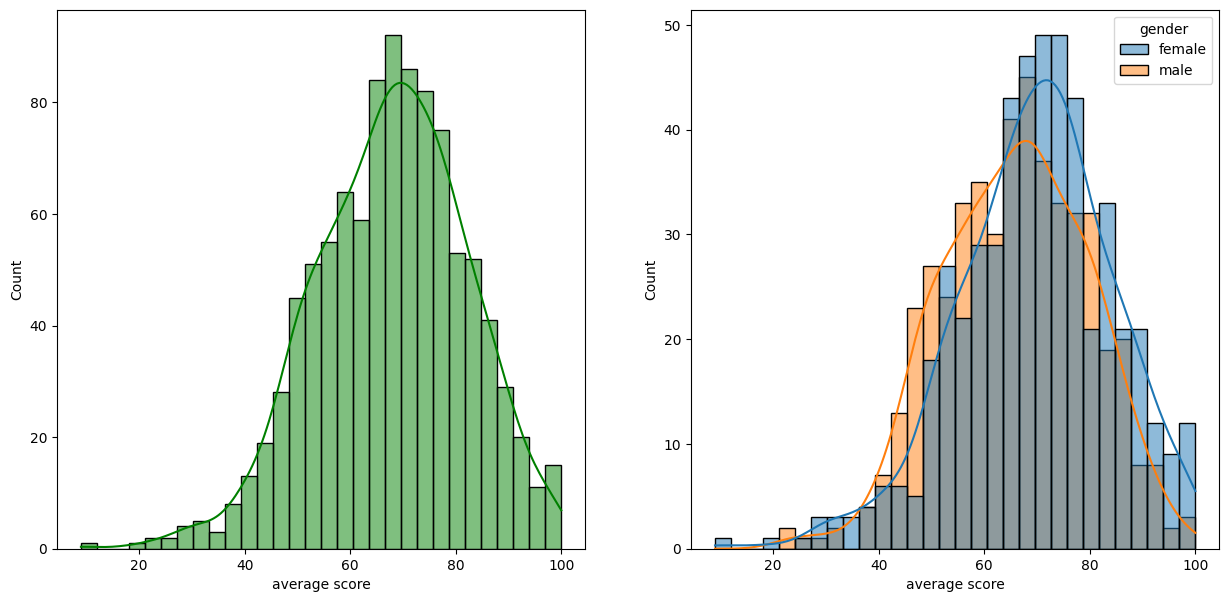

In [43]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average score',bins=30,kde=True,hue='gender')
plt.show()

### Insight
Female perform better than male.

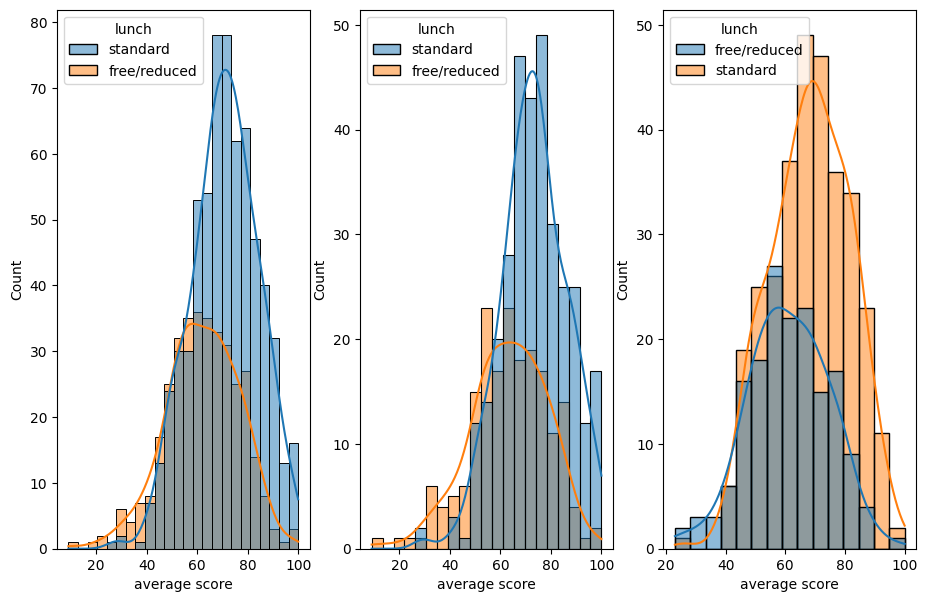

In [44]:
fig, ax = plt.subplots(1,3, figsize=(15,7))
plt.subplot(141)
sns.histplot(data=df,x='average score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='lunch')
plt.show()

### Insights
- Students that had standard lunch are performing better than students who dont.
- Having lunch helps the students perform regardless of their gender.

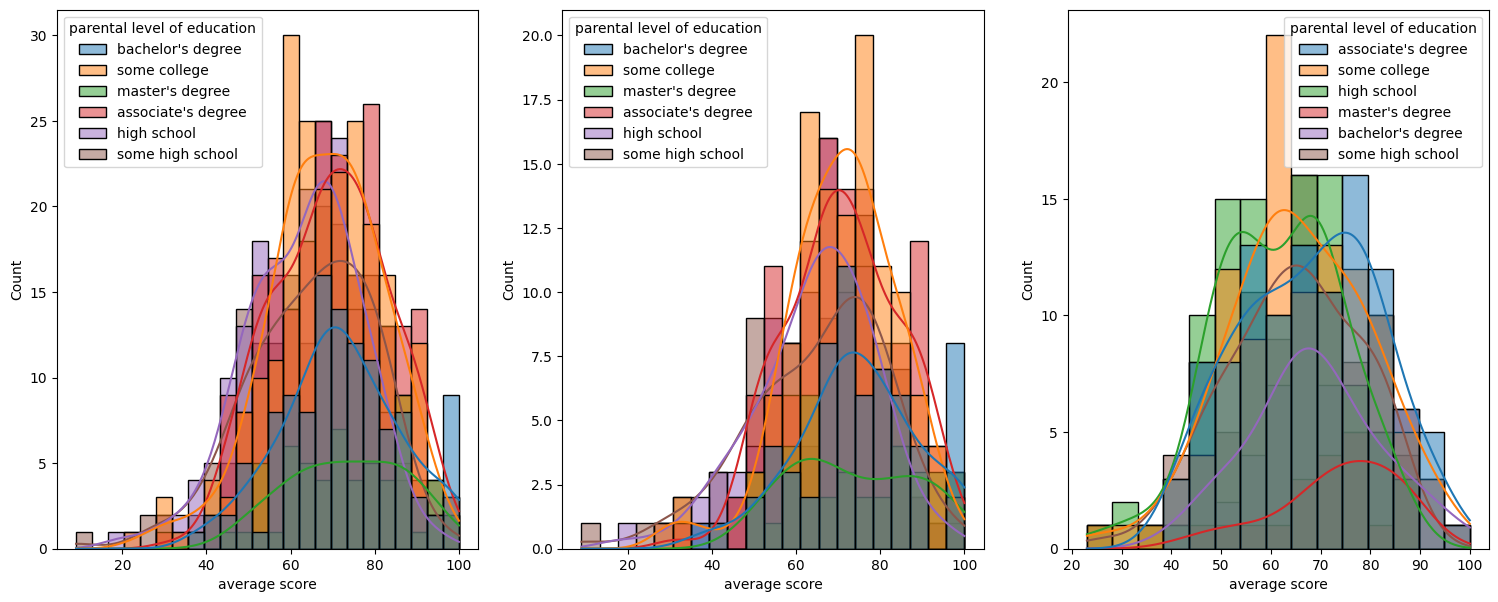

In [46]:
fig, ax = plt.subplots(1,3, figsize=(25,7))
plt.subplot(141)
sns.histplot(data=df,x='average score',kde=True,hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='parental level of education')
plt.show()

### Insights
- Overall parents education level doesnt affect students performance.
- However, from 3rd plot, we can see that higher education levels does helped male students performance. 

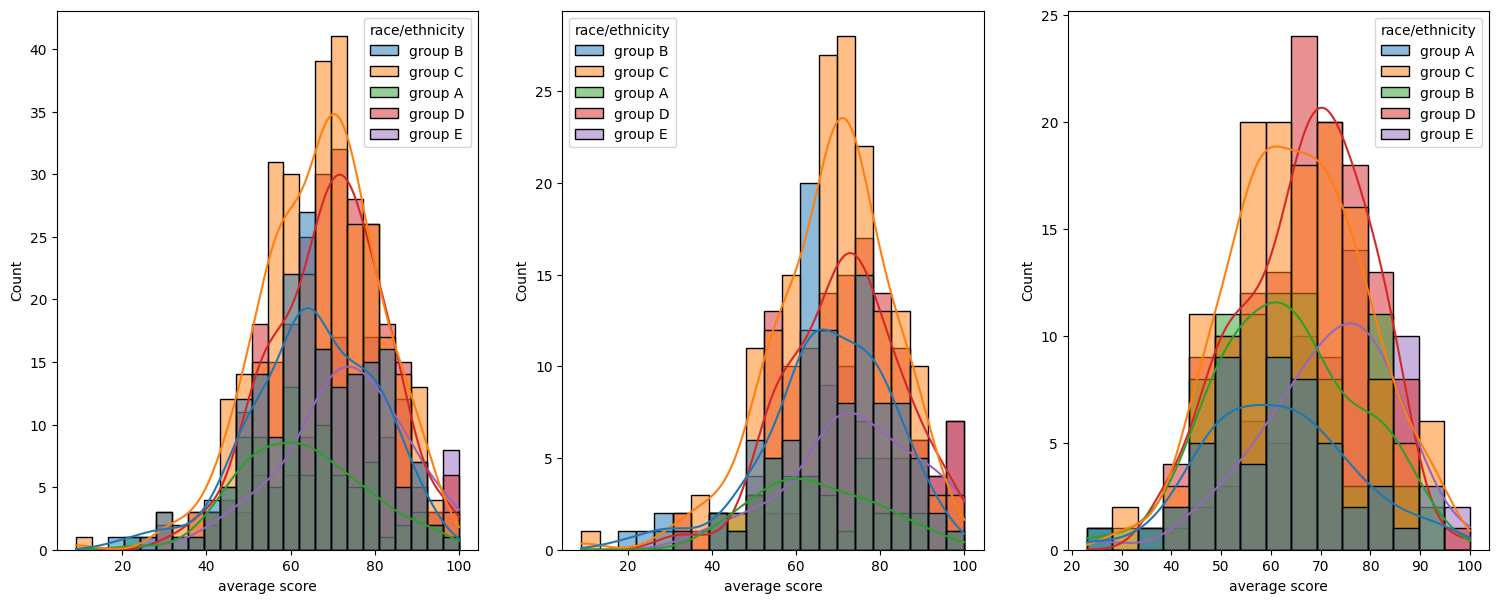

In [47]:
fig, ax = plt.subplots(1,3, figsize=(25,7))
plt.subplot(141)
sns.histplot(data=df,x='average score',kde=True,hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='race/ethnicity')
plt.show()

### Insights
- Group A and B tends to perform poorly in exam regardless of gender.

### 4.2 Score distribution of students in all three subjects

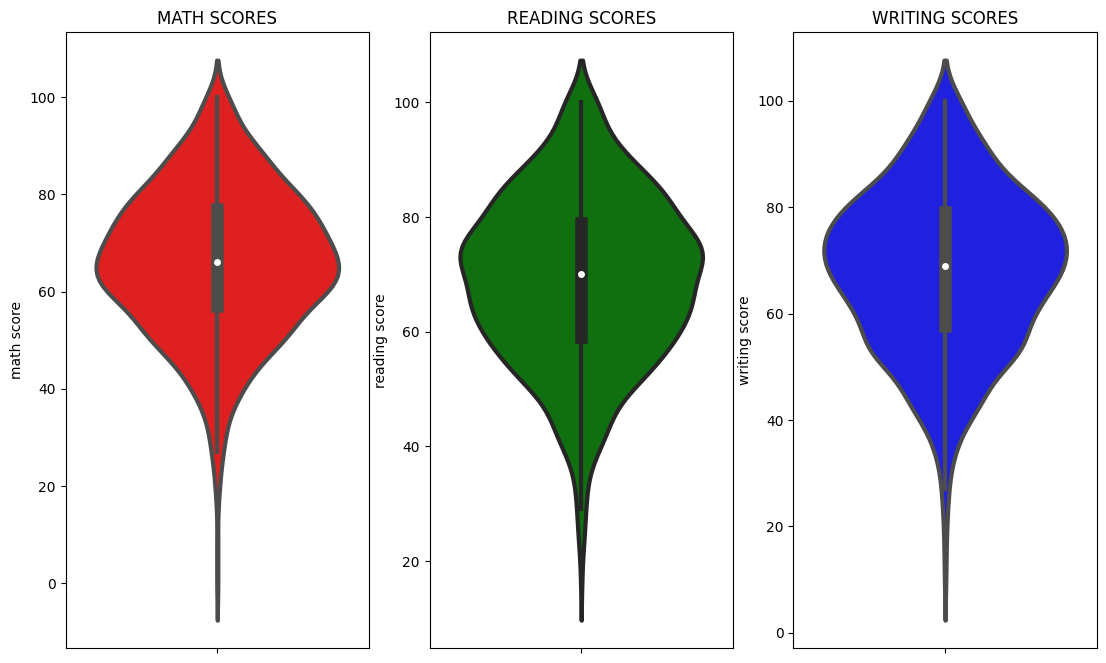

In [48]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

### Insights
From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### 4.3 Multivariate analysis using pieplot

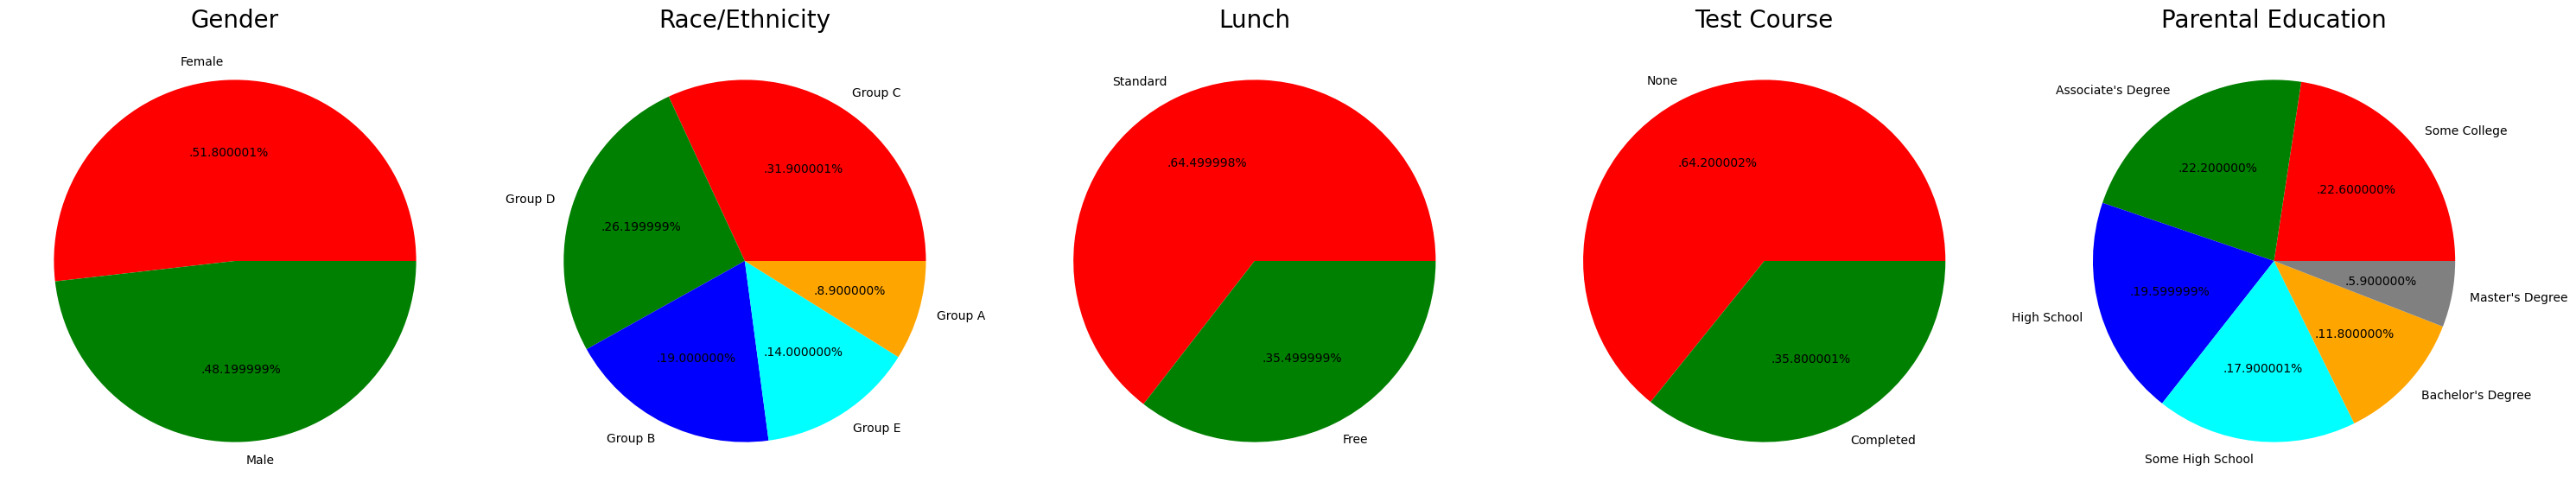

In [49]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

### Insights
- Number of students is almost equal in terms of gender.
- There are many students from ethnicity of Group C.
- Most of the students are having standard lunch.
- Most of the students have not enrolled in test preparation course.
- Most of the parents education level are 'some college' followed by 'associate's degree'.

### 4.4 Feature Wise Visualization

### 4.4.1 Gender Impact on students performance
### Univariate Analysis

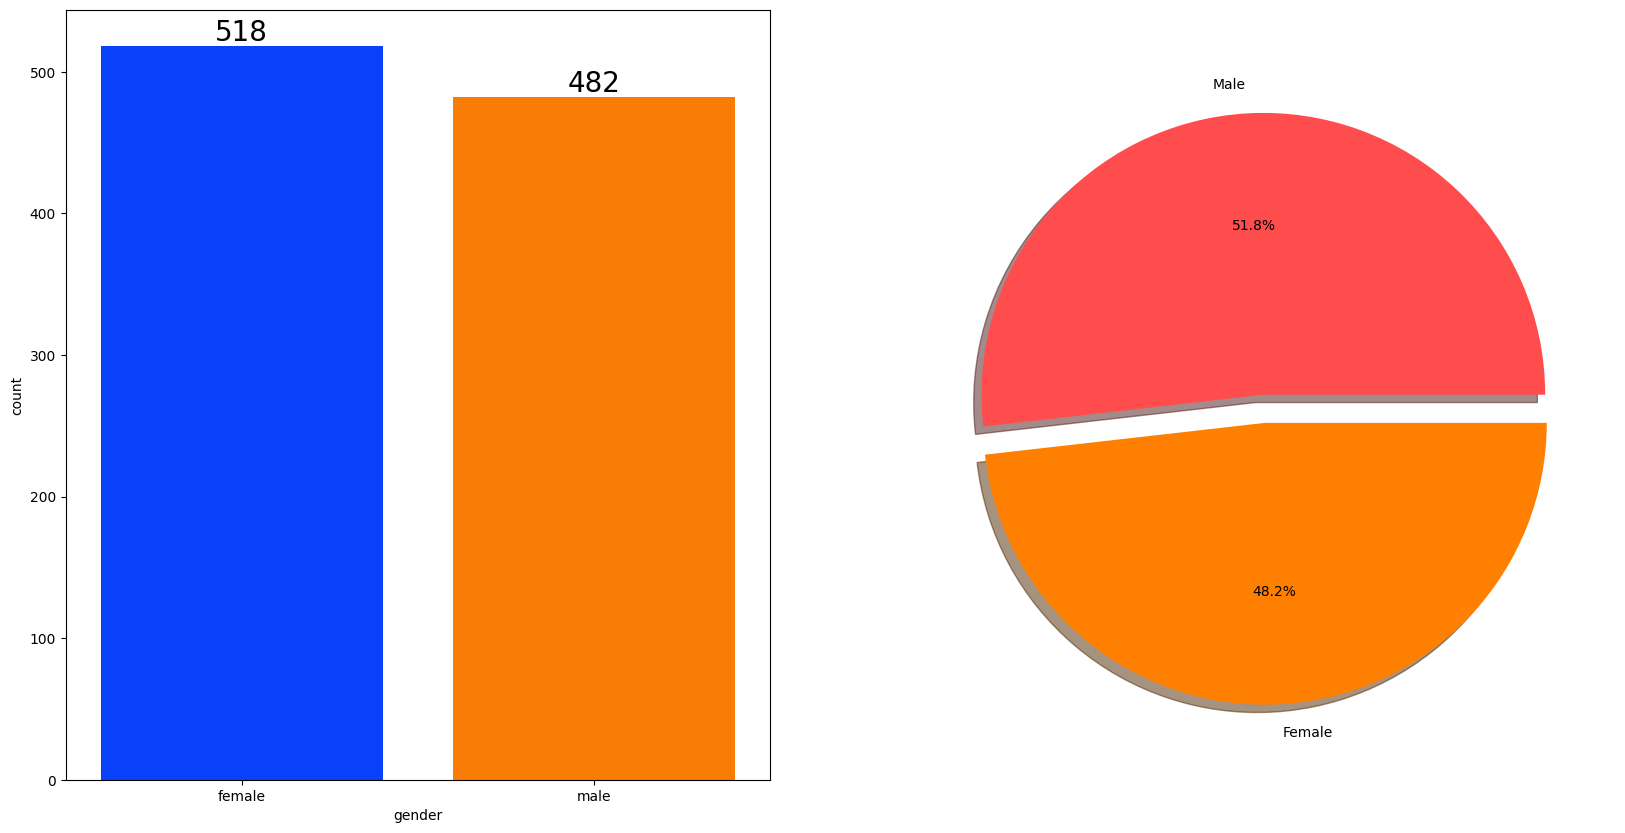

In [50]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

### Insights
Student gender data is balanced.

### Bivariate Analysis
- The performance on each subject based on the gender of the students.

In [72]:
gender_group = df.groupby('gender')[['math score','reading score','writing score','average score']].mean()
gender_group

,math score,reading score,writing score,average score
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


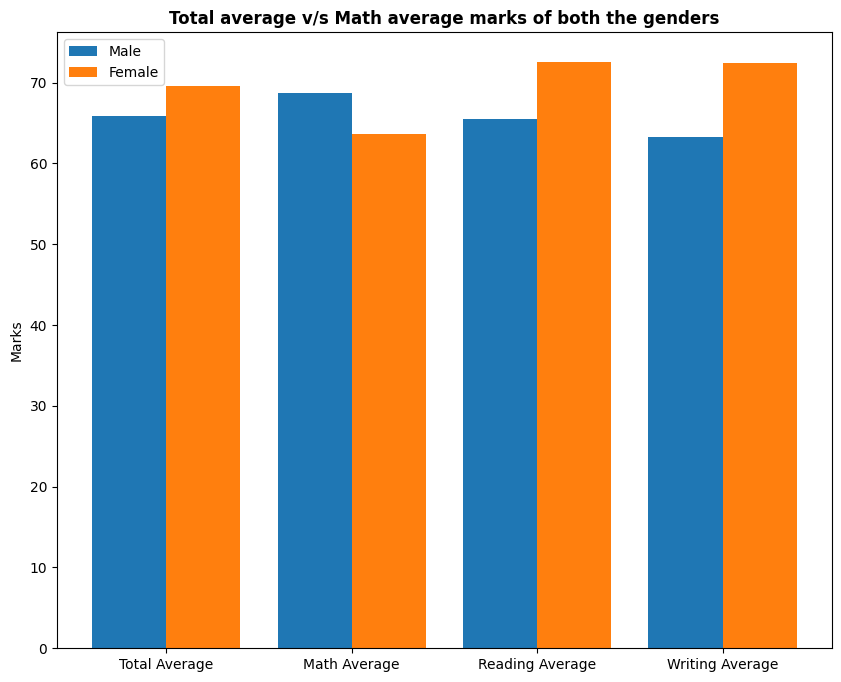

In [80]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average', 'Reading Average', 'Writing Average']


female_scores = [gender_group['average score'][0], gender_group['math score'][0],gender_group['reading score'][0],gender_group['writing score'][0]]
male_scores = [gender_group['average score'][1], gender_group['math score'][1],gender_group['reading score'][1],gender_group['writing score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

### Insights
- Female scores higher than male in total, however male students are better in math compared to female students.

### 4.1.2 Race impact on students performance
#### Univariate analysis
- The distribution of students' race.

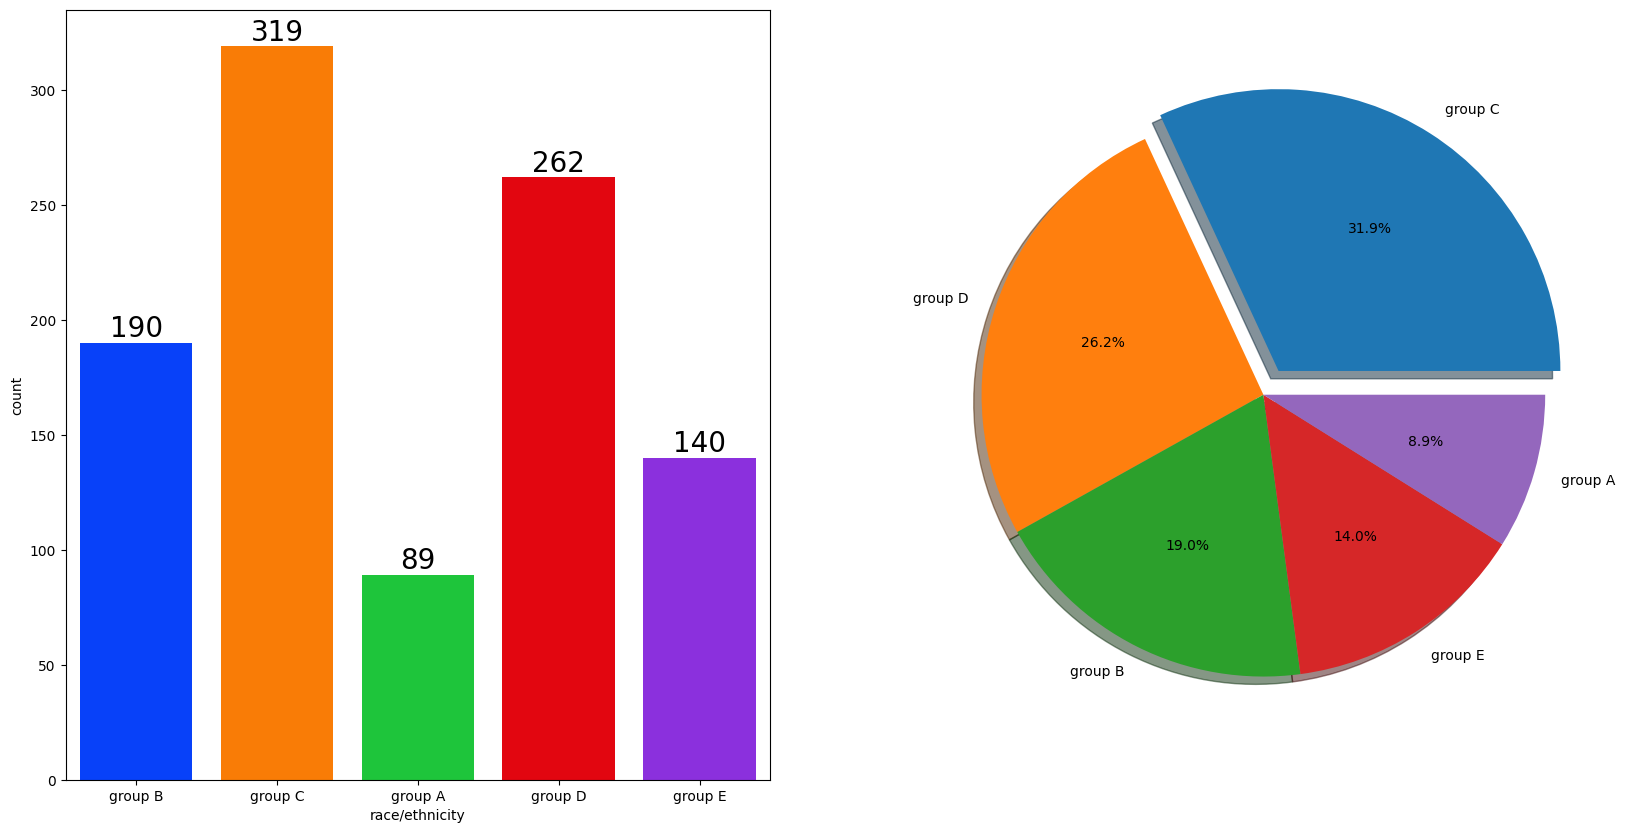

In [89]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()  

#### Insight
- There are higher number of students from Group C and D.
- Group A has the lowest number of students.

### Bivariate analysis
- Relationship between race and students performance.

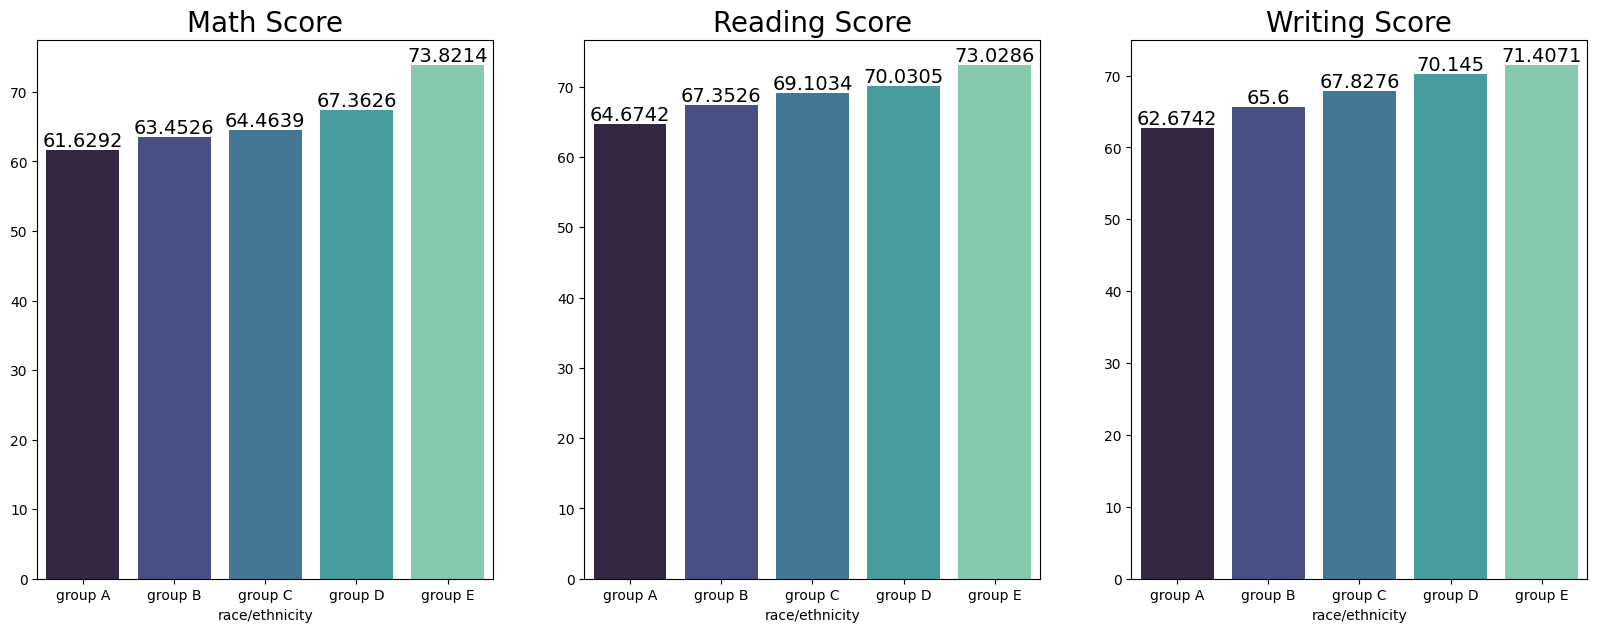

In [98]:
grouped_data = df.groupby('race/ethnicity')
f, ax = plt.subplots(1,3,figsize=(20,7))
sns.barplot(x=grouped_data['math score'].mean().index,y=grouped_data['math score'].mean().values,palette='mako',ax=ax[0])
ax[0].set_title('Math Score',color='black',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color ='black',size=14)

sns.barplot(x=grouped_data['reading score'].mean().index,y=grouped_data['reading score'].mean().values,palette='mako',ax=ax[1])
ax[1].set_title('Reading Score',color='black',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color ='black',size=14)

sns.barplot(x=grouped_data['writing score'].mean().index,y=grouped_data['writing score'].mean().values,palette='mako',ax=ax[2])
ax[2].set_title('Writing Score',color='black',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color ='black',size=14)

#### Insights
- Students from Group E have the highest average in all subjects.
- Students from Group A have the lowest average in all subjects.
- Students from lower socioeconomic status tends to perform poorly in all subjects.

### 4.1.3 Parental Level of Education

### Univariate Analysis

In [101]:
df['parental level of education']

0       bachelor's degree
1            some college
2         master's degree
3      associate's degree
4            some college
              ...        
995       master's degree
996           high school
997           high school
998          some college
999          some college
Name: parental level of education, Length: 1000, dtype: object

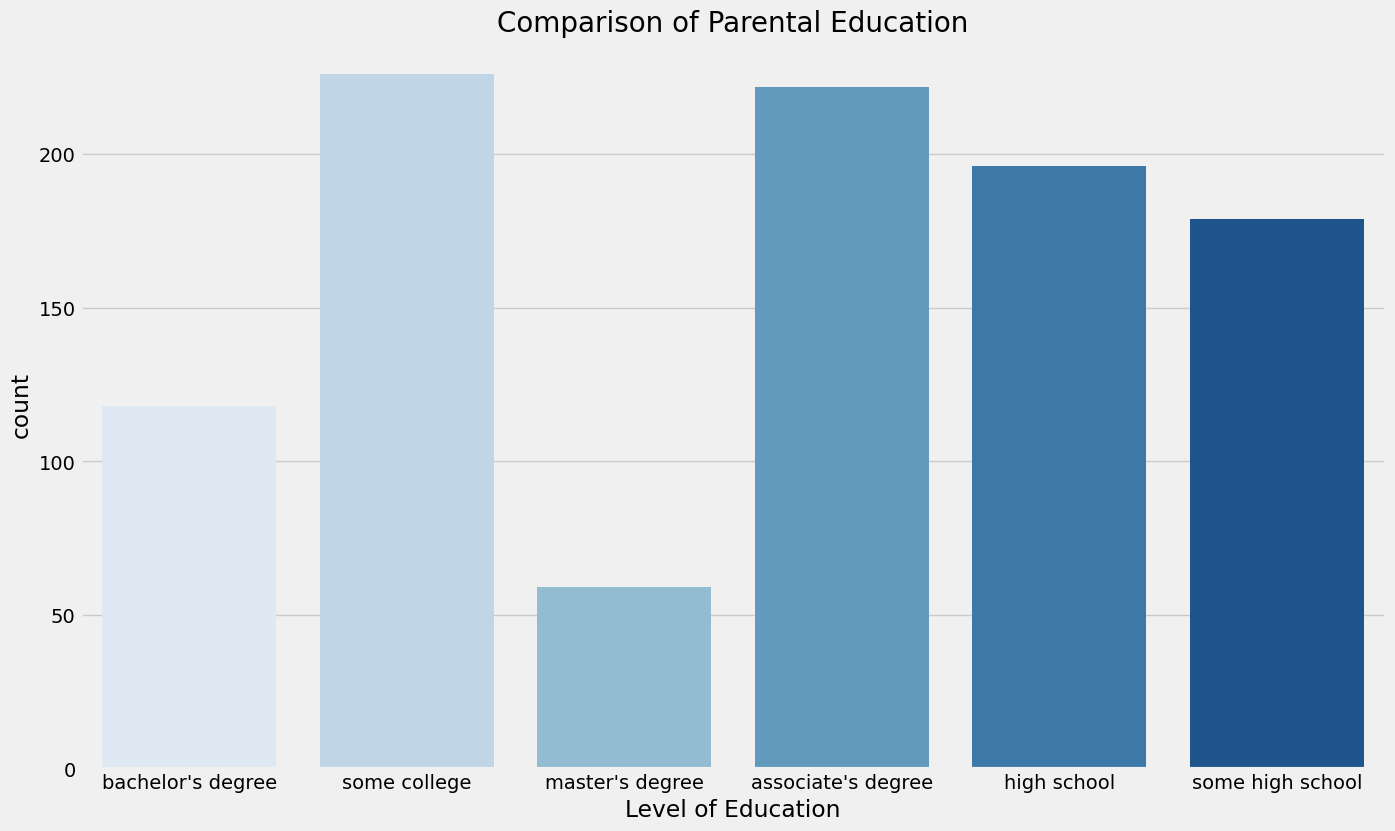

In [103]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df, x='parental level of education', palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Level of Education')
plt.ylabel('count')
plt.show()

#### Insights
Most parents have the education level of some college or associate's degree.

### Bivariate Analysis
Impact between parents education level and stuents performance.

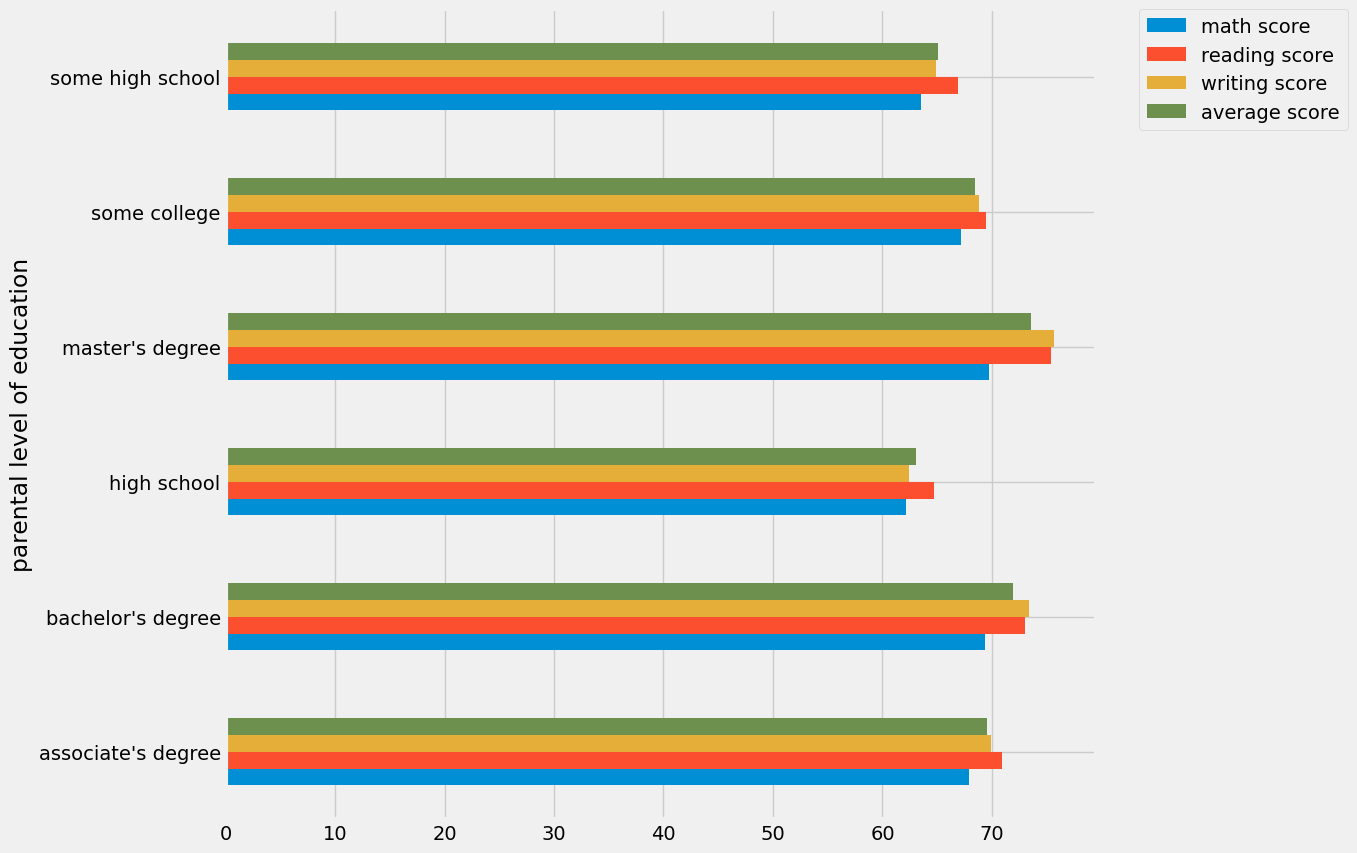

In [110]:
df.groupby('parental level of education').mean(numeric_only=True).drop(columns='total score').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights
- The score of student whose parents possess master and bachelor level education are higher than others.

### 4.4.4 Lunch

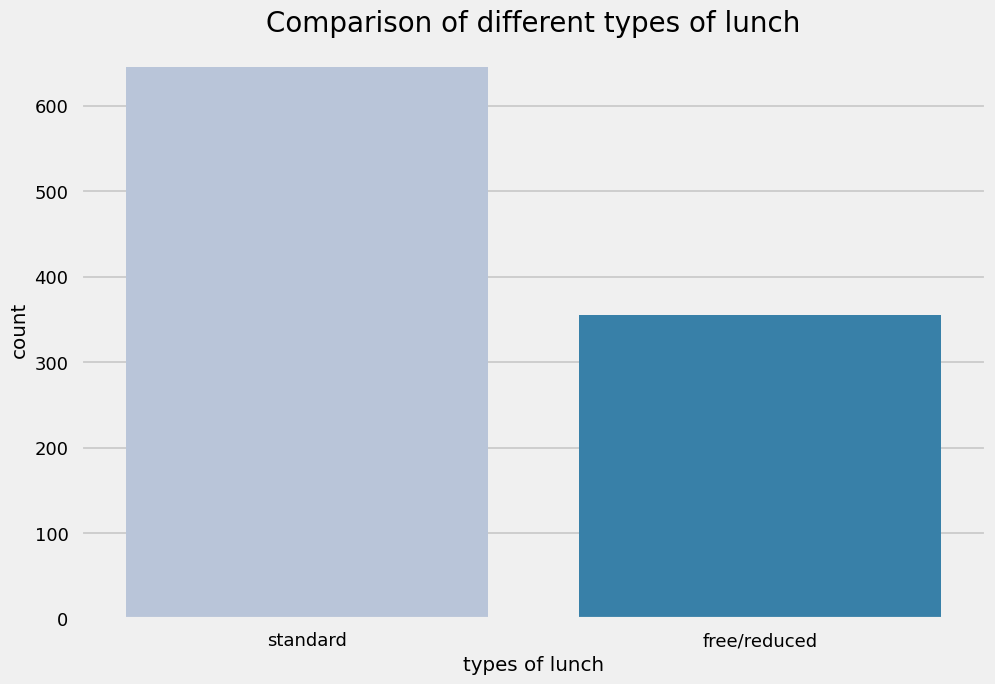

In [113]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df,x='lunch', palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

<Axes: xlabel='lunch', ylabel='writing score'>

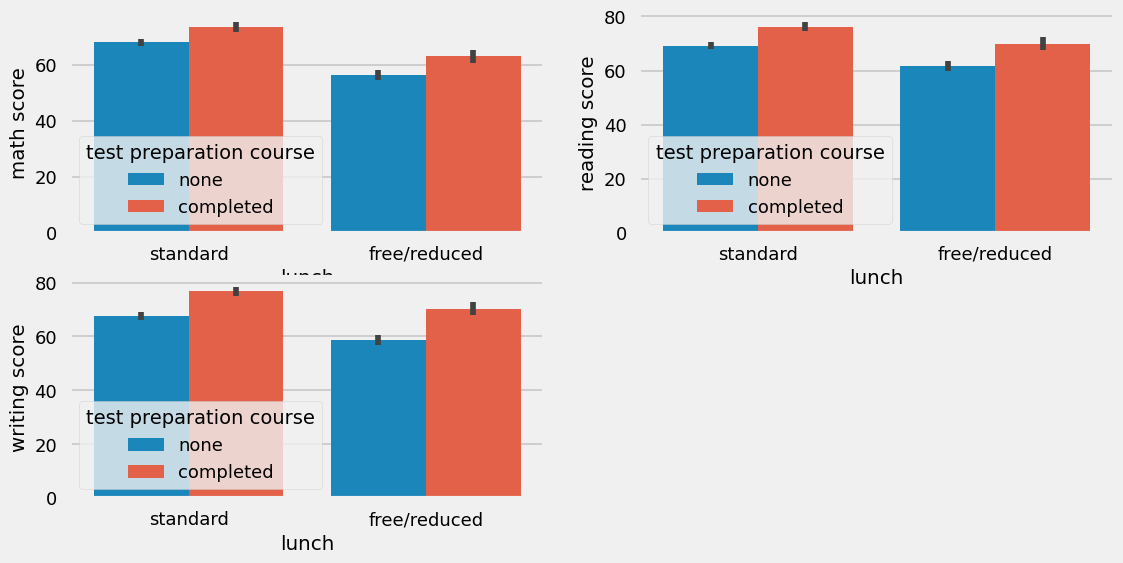

In [126]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

### Insights
Students that took the test preparation course performed better regardless of the type of lunch.

### 4.4.5 Check outliers

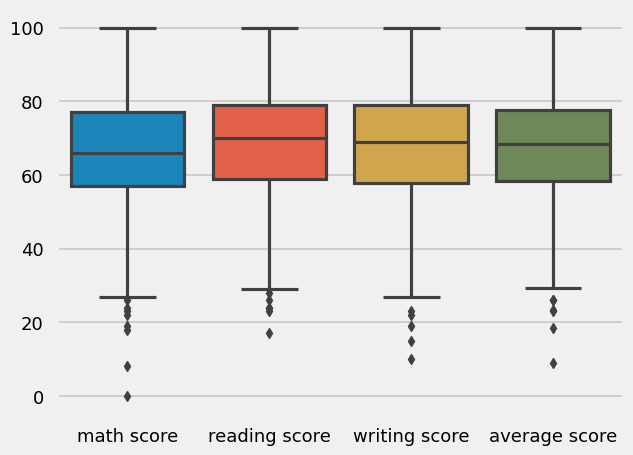

In [137]:
plt.subplots(1,1,figsize=(30,5))
plt.subplot(141)
sns.boxplot(df[['math score','reading score','writing score','average score']])
plt.show()

### Insights
- Reading score has the highest median.
- Math has the most number of outliers.

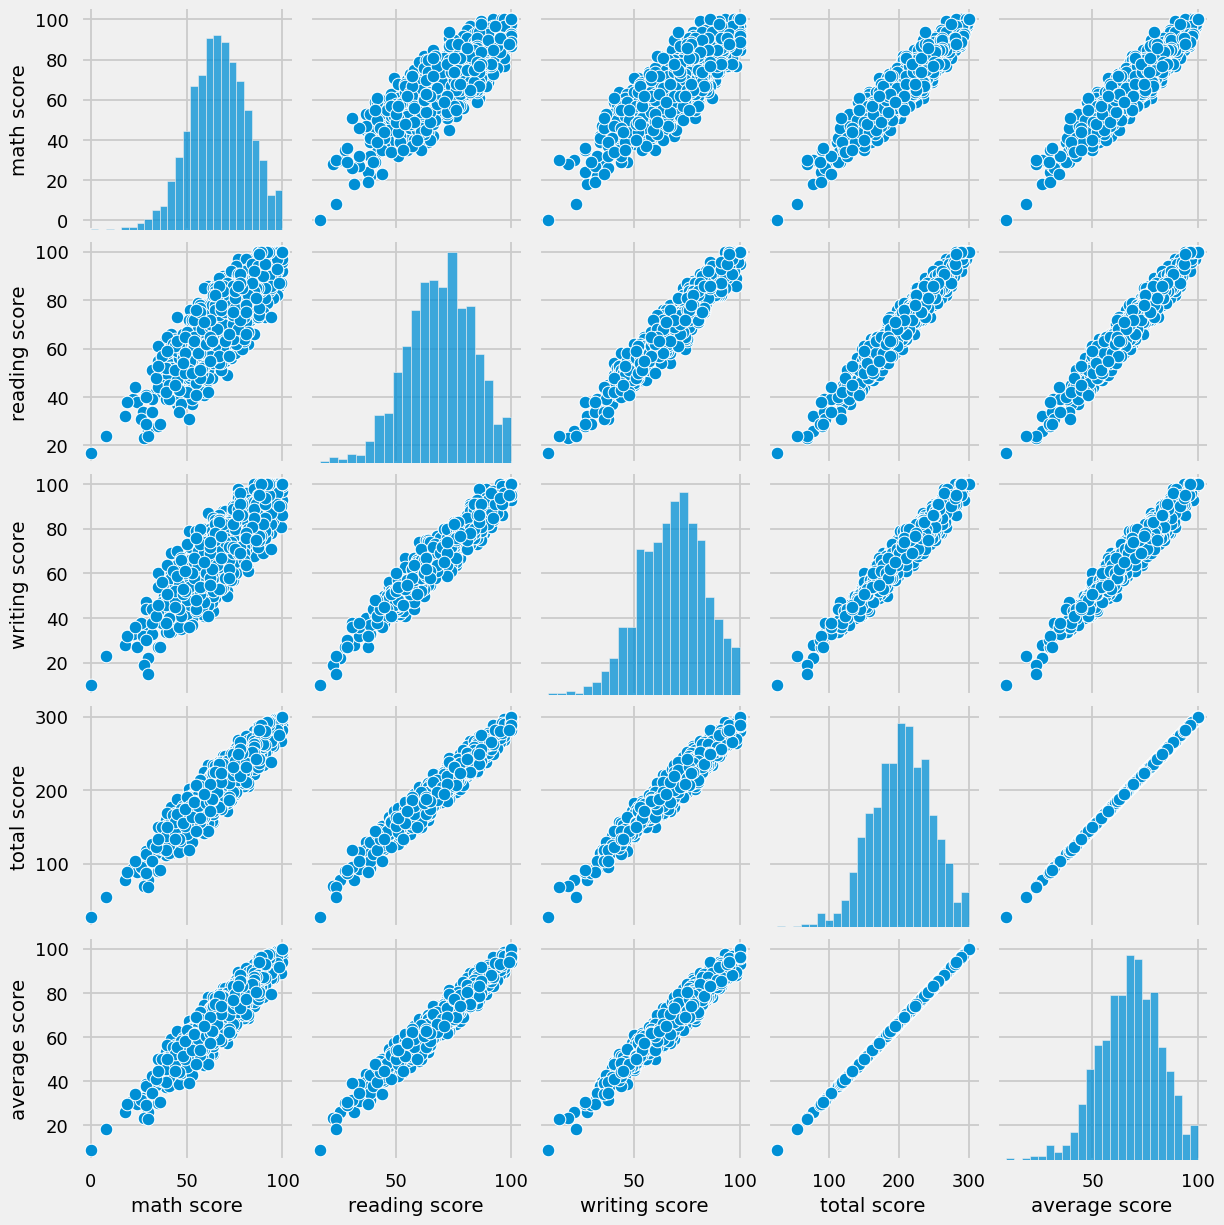

In [139]:
sns.pairplot(df)
plt.show()

### Conclusion
- Lunch, race and parental education have the highest influence on students performance compared to other features.
- Female students have higher pass rate and better performance overall.
- Student that had done test preparation course performed significantly better.
